C:\Users\jinni\AppData\Local\Temp\ipykernel_1152\3122894376.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='parental level of education', y='average score', order=edu_order, palette='viridis')


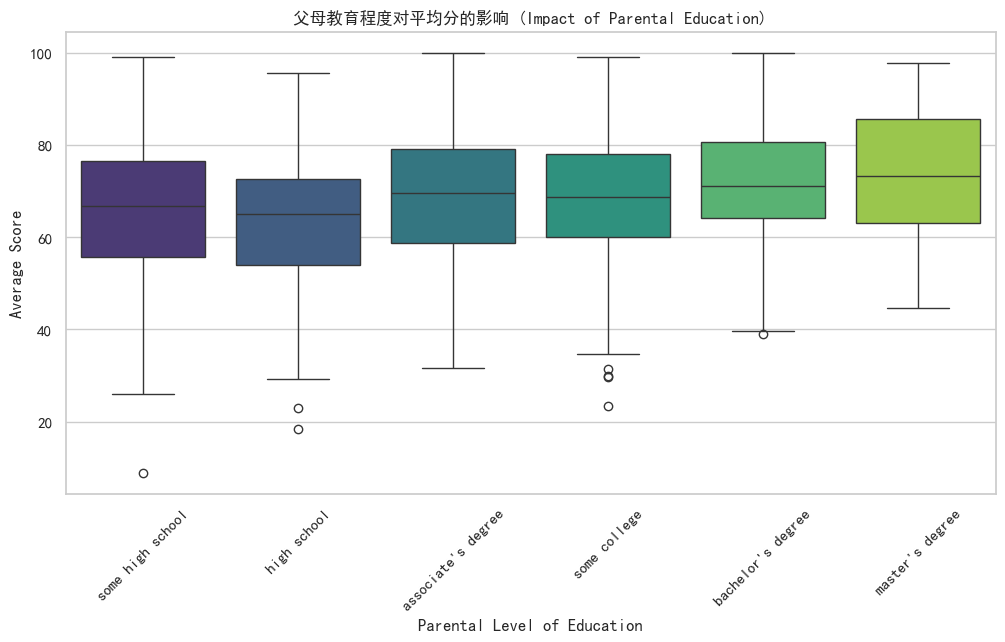

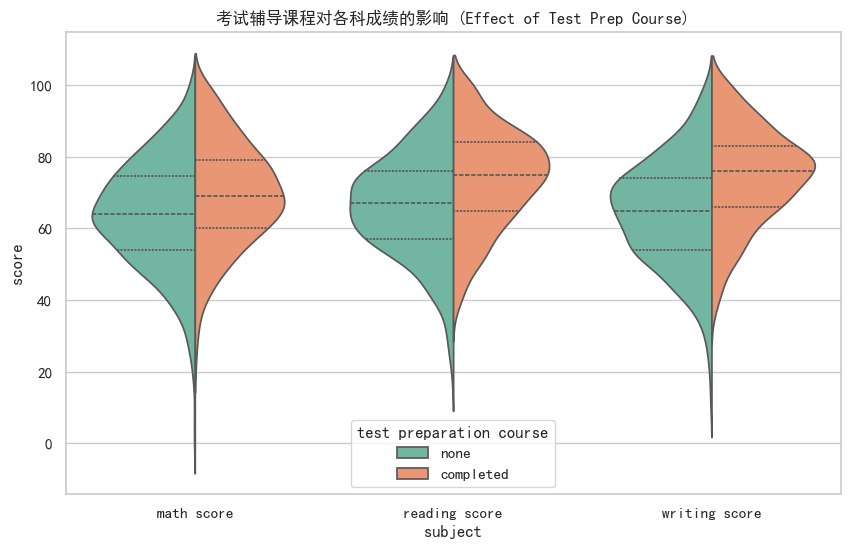

------------------------------
单因素方差分析 (One-way ANOVA) - Race/Ethnicity
F-statistic: 9.0961
P-value: 3.2259e-07
结论: P值小于0.05，拒绝原假设。说明不同种族/族裔之间的平均分存在显著差异。
------------------------------


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# 设置绘图风格和字体（适配中文显示，如果需要）
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial'] 
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 父母教育程度对平均分的影响 (箱线图)
# ==========================================
plt.figure(figsize=(12, 6))

# 定义教育程度的顺序 (Ordinal)
edu_order = [
    "some high school", "high school", "associate's degree",
    "some college", "bachelor's degree", "master's degree"
]

# 绘制箱线图：展示不同教育程度下的分数分布和中位数差异
sns.boxplot(data=df, x='parental level of education', y='average score', order=edu_order, palette='viridis')
plt.title('父母教育程度对平均分的影响 (Impact of Parental Education)')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45) # 旋转标签以防重叠
plt.show()

# ==========================================
# 2. 考试辅导课程对三科成绩的影响 (分组小提琴图)
# ==========================================
# 数据转换：将三科成绩转换为长格式 (Long Format) 以便进行分组绘图
df_long = df.melt(
    id_vars=['test preparation course'], 
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='subject', 
    value_name='score'
)

plt.figure(figsize=(10, 6))
# 使用 split=True 的小提琴图，直观对比参加(completed)与未参加(none)的分布形状
sns.violinplot(data=df_long, x='subject', y='score', hue='test preparation course', 
               split=True, inner='quartile', palette='Set2')
plt.title('考试辅导课程对各科成绩的影响 (Effect of Test Prep Course)')
plt.show()

# ==========================================
# 3. 统计检验 (ANOVA): 种族/族裔对平均分的差异显著性
# ==========================================
print("-" * 30)
print("单因素方差分析 (One-way ANOVA) - Race/Ethnicity")

# 提取不同种族组别的平均分数据
groups = [group['average score'].values for name, group in df.groupby('race/ethnicity')]

# 执行 ANOVA 检验
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("结论: P值小于0.05，拒绝原假设。说明不同种族/族裔之间的平均分存在显著差异。")
else:
    print("结论: P值大于0.05，无法拒绝原假设。说明不同种族/族裔之间的平均分没有显著差异。")
print("-" * 30)